In [1]:
import pandas as pd
import numpy as np

top_num=10

df = pd.read_csv("train.shuf.csv")
df.target.astype(int)
dfs_info = pd.read_csv("songs.csv")
dfu_info = pd.read_csv("members.csv")

Index(['周杰倫 (Jay Chou)', '孫盛希 (Shi Shi)', 'BLACKPINK', '莊心妍', 'Justin Bieber',
       '林俊傑 (JJ Lin)', 'Mike Posner', '蔡健雅 (Tanya Chua)', '曾沛慈 (Pets Tseng)',
       'Various Artists', '黃小琥 (Tiger Huang)', '蔣卓嘉 (GJ)', '陳奕迅 (Eason Chan)',
       '五月天 (Mayday)', '吳建豪 (Vanness Wu)', '玖壹壹', '王源 (Roy Wang)',
       'The Chainsmokers', '楊乃文 (Naiwen Yang)', '王力宏 (Leehom Wang)',
       'The Weeknd', 'I.O.I', '蕭亞軒 (Elva Hsiao)', '謝和弦 (R-chord)',
       'David Guetta', 'LYn', 'A-Lin', '朱俐靜 (Miu Chu)', '戴佩妮 (Penny Tai)',
       '田馥甄 (Hebe)', 'Lady Gaga', '羅美玲 (Irene Luo)', 'Ariana Grande',
       'aMEI (張惠妹)', '張衛健 (Dicky Cheung)', 'Nicki Minaj', 'AMIT', '畢書盡 (Bii)',
       '鹿晗', 'Bii畢書盡+陳勢安+陳彥允+李玉璽', 'Jessie J', '嚴爵 (Yen-j)',
       'Girls' Generation (少女時代)', 'Sam Smith', '飛兒樂團 (F.I.R.)',
       '蔡依林 (Jolin Tsai)', '孫燕姿 (Yanzi Sun)', '吳汶芳 (Fang Wu)', 'α波童話音樂盒系列',
       'HyunA', '品冠 (Victor Wong)', '徐佳瑩 (Lala Hsu)', 'Imagine Dragons',
       'Coldplay', 'Muse', '井柏然', '劉若英 (Rene Liu)',
       '[逆

/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23403 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30427 missing from current font.
  font.set_text(s, 0.0, flags=fl

/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20523 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23403 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30427 missing from current font.
  font.set_text(s, 0, flags=flags)
/home

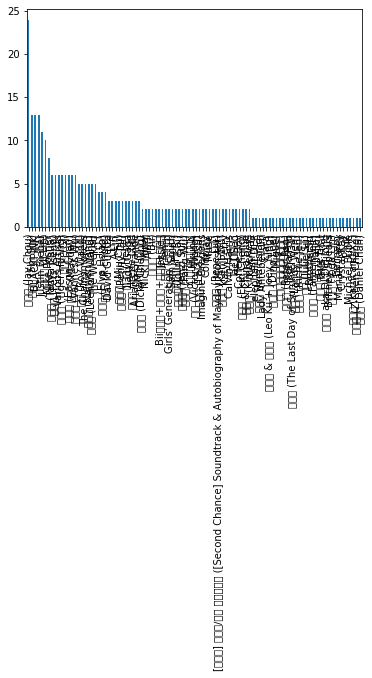

In [2]:
dfs_info.head()

dfs_info['artist_name'] = dfs_info['artist_name'].apply(lambda x: str(x).strip('|').split('|'))

dfs_info.head()

df_context = pd.merge(df, dfs_info, on='song_id', how='left')

df_context_explode = df_context.explode('artist_name')

artist_counts = df_context_explode['artist_name'].value_counts()

filter_num=101
artist_counts[1:filter_num].plot(kind='bar')
artist_counts[1:filter_num].sum()
myfilter = artist_counts[1:filter_num].index
myfilter

In [3]:
dfs_info_explode = dfs_info.explode('artist_name')

dfs_info_filter = dfs_info_explode[ dfs_info_explode.artist_name.isin(myfilter) ]

item = dfs_info_filter[ ['genre_ids', 'artist_name' ] ]

item['genre_ids'] = item['genre_ids'].apply( lambda x : str(x).split('|'))

item = item.explode('genre_ids')

genre_gby = item.groupby('artist_name')['genre_ids'].apply(list)

item = genre_gby.reset_index()

def merge(mylist):
    return "|".join(mylist)

item['genre_ids'] = item['genre_ids'].apply(set)
item['genre_ids'] = item['genre_ids'].apply(merge)

item.to_csv("item.csv", index = False)

item.head()

/home/johncreed/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist_name,genre_ids
0,A-Lin,458|465|nan
1,AMIT,465|nan
2,Ariana Grande,465|691
3,BLACKPINK,444
4,Bii畢書盡+陳勢安+陳彥允+李玉璽,465


In [4]:
df_context_filter = df_context_explode[ df_context_explode['artist_name'].isin(myfilter) ]

item_label = item.reset_index()
item_label = item_label.rename(columns={'index': 'label'}).drop(columns=['genre_ids'])

df_context_filter = pd.merge(df_context_filter, item_label, on='artist_name', how='left')

context = df_context_filter.drop(columns=['artist_name', 'composer', 'song_length', 'genre_ids', 'language', 'lyricist', 'target'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label
0,NoyTlB2G5AqMxiX8duezDHkscZlCRjDDJQSFoaUy/Y8=,7vGvrf5l1XzNbeLZXzQgaNvc2VBmncarpN3LQpLUZiY=,my library,Local playlist more,local-library,55
1,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,discover,Discover Chart,online-playlist,84
2,v44I6GJiY7DN6OMMNl4JgxgPE80uCr5d5JAMA2Lp30E=,bCmDv8aIkMgo9OFaVMFaKcbaF8jLBJaINI70zGJwIE8=,discover,Online playlist more,online-playlist,53
3,3KRe7xVv7NljMOzJ6CmjhUdyvVNbUhJ7HdT/yHyK0SA=,VDstDo5QY4AEUvoEUj2LaAFdHxVqop5kQ+I7YTmEmMQ=,my library,Local playlist more,local-library,87
4,BCRaRkps5gerQgoqWyEm7p92Yd7MW6VKm19Rq9G/IEk=,bCmDv8aIkMgo9OFaVMFaKcbaF8jLBJaINI70zGJwIE8=,discover,Online playlist more,online-playlist,53


In [5]:
dset = {}
context['his'] = np.nan
context['his'] = context.his.apply(str)
for i, row in context.iterrows():
    user_id = row['msno']
    song_id = str(row['song_id'])
    if user_id in dset:
        context.at[i, 'his'] = '|'.join(dset[user_id][-50:])
        dset[user_id].append(song_id)
    else:
        dset[user_id] = [song_id]
    if i % 100000 == 0:
        print(i)

context.tail()

0


,msno,song_id,source_system_tab,source_screen_name,source_type,label,his
306,ttk3pWY+DSlV7iptXt83wHgltM4xrqxJX5xBuyxUKRg=,LBFRdBacp7Ob6Ada2N7uCQ47DhiNT2KjUtwOA7oSm7I=,discover,Online playlist more,online-playlist,60,nan
307,JzYn8JIS5qs0DPSToraQSs7OJ4giS3vE+Op+I74ajOs=,u+Qx0OBDpWzApkKL0t3kH0DokXEMjsn1JBbxjQFmTNk=,my library,Local playlist more,local-playlist,71,nan
308,Njaf6CU8NcFwbSDUP7Ml0qGp0wpQVWY6eeGyi4jMA+g=,fZAD1YVdN+jCTikKYdnmUqouNY+4MmpUP5pFTpwyV1g=,my library,Local playlist more,local-library,64,IRg9uI6CApDbJOlq25+jQzDvh8jnSJLAwDbvf1JCTOc=|x...
309,kXkMzhyacFrtSI922IBs0BcmNxKedV4+837lljPNTQA=,LBFRdBacp7Ob6Ada2N7uCQ47DhiNT2KjUtwOA7oSm7I=,discover,Discover Feature,online-playlist,60,nan
310,1WRv3lXnfXjvSKPXJD8zB//iTTIuKAiWQLjM3vy2+gc=,6+UerVQI9wKbIj+3ibxhA7B0LVpiQ7QaXyVtoM3zVs4=,my library,Local playlist more,local-playlist,61,nan


In [6]:
context = pd.merge(context, dfu_info, on='msno', how='left')
context.head()
context = context.drop(columns=['registered_via', 'registration_init_time', 'expiration_date', 'bd'])

In [7]:
context.to_csv("context.csv", index = False)